In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

def correl(X, Y):
    """Computes the Pearson correlation coefficient and a 95% confidence
    interval based on the data in X and Y."""
    r = np.corrcoef(X, Y)[0,1]
    f = 0.5*np.log((1+r)/(1-r))
    se = 1/np.sqrt(len(X)-3)
    ucl = f + 2*se
    lcl = f - 2*se
    #
    lcl = (np.exp(2*lcl) - 1) / (np.exp(2*lcl) + 1)
    ucl = (np.exp(2*ucl) - 1) / (np.exp(2*ucl) + 1)
    return r,lcl,ucl

#Get IDs
#Get peerfactors #V1 V2 V3 V4 ... V17
peerfactors = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Adipose-Subcutaneous/peerFactors.tsv',sep='\t')
idx = sorted([x.replace('.','-') for x in list(peerfactors.index)])
print (len(idx))
peerfactors.index = idx
print (peerfactors.shape)
#print (idx)

#Get covariates & Other phenotypes
    #AGE - RACE - ETHNICITY

    #Get Sample variabls from phonotype table
Phenotypes='/storage/resources/datasets/gtex/53844/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002743.v6.p1.c1.GTEx_Sample_Attributes.GRU.txt.gz'
IT=pd.read_csv(Phenotypes, compression='gzip', sep='\t', quotechar='"', skiprows=10)
IT = IT.loc[IT['SMMTRLTP'].isin(['Whole Blood:Whole Blood'])] #
IT['SAMPID'] = [x[:9] for x in list(IT['SAMPID'])]   #Reformat ID first 9 char
print (len(IT['SAMPID']))   
#print (IT)#.columns)
code=['SAMPID','SMGEBTCH','SMTSISCH','SMTPAX','SMTSTPTREF','SMNABTCH','SMCENTER']
Vars = IT.loc[:,code]
Vars = Vars.loc[Vars['SAMPID'].isin(idx)]   #Select only the we are interested in
Vars = Vars.groupby('SAMPID').first()      #There Duplicate... Remove it
#print(peerfactors)
print(Vars.shape, ' Next... peer')
#Get all matching samples Expr--Phenotypes
L=list(Vars.index)
peerfactors = peerfactors.loc[peerfactors.index.isin(L)]
print(peerfactors.shape, ' Next ... plot')

#------------------#SMGEBTCH**  SMTSISCH  SMTPAX*nan*  SMTSTPTREF*   SMNABTCH**  SMCENTER 
Index=['V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

SMTSISCH = [ss.pearsonr(peerfactors[YY].values,Vars['SMTSISCH'].values)[0] for YY in Index]
SMCENTER = [ss.spearmanr(peerfactors[YY].values,Vars['SMCENTER'].values).correlation for YY in Index]
SMTSTPTREF =[ss.spearmanr(peerfactors[YY].values,Vars['SMTSTPTREF'].values).correlation for YY in Index]

#GET other phenotypes

Phenotypes='/storage/resources/datasets/gtex/53844/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002742.v6.p1.c1.GTEx_Subject_Phenotypes.GRU.txt.gz'
IT=pd.read_csv(Phenotypes, compression='gzip', sep='\t', quotechar='"', skiprows=10)
#IT['SAMPID'] = [x[:9] for x in list(IT['SAMPID'])]
ind=['SUBJID','AGE','TRISCHD','RACE','GENDER', 'DTHHRDY', 'SMTSISCH']
Ischtime = IT.loc[:,ind]
Isctime=Ischtime.loc[Ischtime['SUBJID'].isin(idx)]
Isctime=Isctime.loc[Isctime['SUBJID'].isin(L)]
#print(Isctime['SUBJID'])
print(Isctime.shape)

TRISCHD=[ss.pearsonr(peerfactors[YY].values,Isctime['TRISCHD'].values)[0] for YY in Index]
DTHHRDY=[ss.spearmanr(peerfactors[YY].values,Isctime['DTHHRDY'].values).correlation for YY in Index]
AGE = [ss.pearsonr(peerfactors[YY].values,Isctime['AGE'].values)[0] for YY in Index]

df = pd.DataFrame( {'SMTSISCH': SMTSISCH,'SMCENTER':SMCENTER,'SMTSTPTREF':SMTSTPTREF,
     'TRISCHD': TRISCHD,'DTHHRDY':DTHHRDY, 'AGE':AGE }, index=Index)

X=Vars['SMTSISCH']
print(ss.pearsonr(peerfactors['V2'].values,X.values)[0])
print(ss.pearsonr(peerfactors['V2'].values,X.values)[1])

101
(101, 17)
1449
(98, 6)  Next... peer
(98, 17)  Next ... plot
(98, 7)
0.230616879261
0.022337109746


/usr/lib64/python3.4/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [2]:
def draw_colormap (cmap_name,width=30,height=4,fontsize=50,fig = None, ax=None,
                  ticklabels_bd = (0,1), num_ticks =11):
    """
    cmap_name is a string.
    """
    if fig is None:
        fig = plt.figure(figsize=(width,height))
    if ax is None:
        ax = plt.gca()
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto',cmap=plt.get_cmap(cmap_name))
    ax.set_xticks(np.linspace(0,256,num_ticks))
    ax.set_xticklabels(np.linspace(ticklabels_bd[0],ticklabels_bd[1],num_ticks))
    ax.set_yticklabels([])

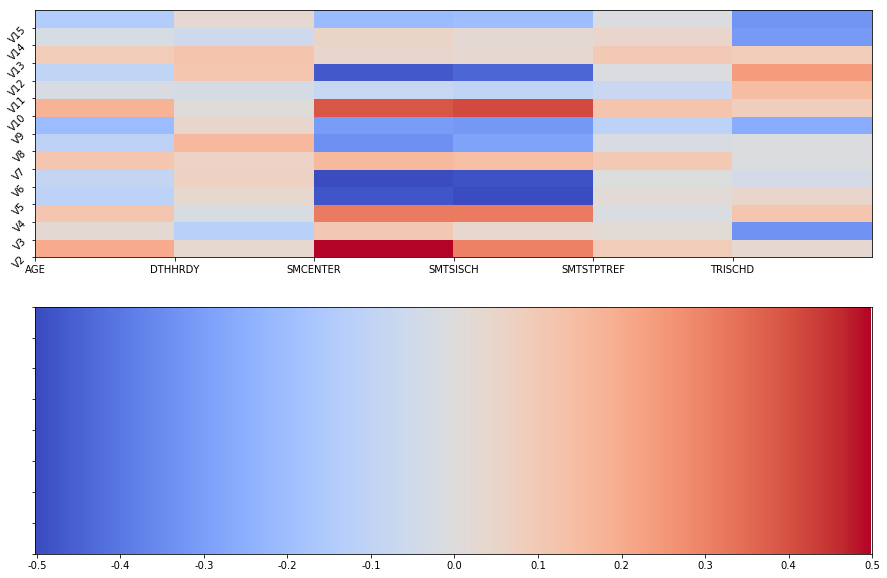

,AGE,DTHHRDY,SMCENTER,SMTSISCH,SMTSTPTREF,TRISCHD
V2,0.149313,0.013212,0.386130,0.230617,0.059420,0.011390
V3,0.008563,-0.115085,0.072727,0.017223,0.002394,-0.281012
V4,0.079357,-0.034670,0.239963,0.240551,-0.027654,0.078255
V5,-0.107519,0.014349,-0.402437,-0.418881,-0.003806,0.020113
V6,-0.086045,0.038834,-0.419042,-0.408862,-0.018692,-0.041621
V7,0.080006,0.036488,0.113494,0.103046,0.069641,-0.022067
V8,-0.103729,0.114572,-0.288883,-0.247755,-0.029925,-0.023051
V9,-0.185749,0.020938,-0.264602,-0.271603,-0.104783,-0.226279
V10,0.130289,-0.007078,0.298763,0.318243,0.085877,0.050603
V11,-0.029378,-0.039579,-0.077131,-0.097698,-0.075718,0.105941


In [3]:
labels = list(df.columns)

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(15,10))
# Add intuitive labels to axes
ax0,ax1 = axes[0],axes[1]
ax0.set_xticks(range(len(labels)))
ax0.set_xticklabels(labels)

ax0.set_yticks(range(14))
ax0.set_yticklabels(df.index,rotation=45)

#visualize correlations using heatmap
ax0.pcolor(df,cmap='coolwarm')

#fig.colorbar(ax0,ticks=np.linspace(0,1,11))
draw_colormap('coolwarm',fig=fig,ax=ax1,ticklabels_bd=(-0.5,0.5))


plt.grid(False)
plt.show()
df

In [5]:
SMTSISCH = [ss.pearsonr(peerfactors[YY].values,Vars['SMTSISCH'].values)[1] for YY in Index]
SMCENTER = [ss.spearmanr(peerfactors[YY].values,Vars['SMCENTER'].values).pvalue for YY in Index]
SMTSTPTREF =[ss.spearmanr(peerfactors[YY].values,Vars['SMTSTPTREF'].values).pvalue for YY in Index]
TRISCHD=[ss.pearsonr(peerfactors[YY].values,Isctime['TRISCHD'].values)[1] for YY in Index]
DTHHRDY=[ss.spearmanr(peerfactors[YY].values,Isctime['DTHHRDY'].values).pvalue for YY in Index]
AGE = [ss.pearsonr(peerfactors[YY].values,Isctime['AGE'].values)[1] for YY in Index]
df1 = pd.DataFrame( {'SMTSISCH': SMTSISCH,'SMCENTER':SMCENTER,'SMTSTPTREF':SMTSTPTREF,
     'TRISCHD': TRISCHD,'DTHHRDY':DTHHRDY, 'AGE':AGE }, index=Index)
df1

/usr/lib64/python3.4/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,AGE,DTHHRDY,SMCENTER,SMTSISCH,SMTSTPTREF,TRISCHD
V2,0.142268,0.897266,0.000086,0.022337,0.561108,0.911367
V3,0.933306,0.259144,0.476673,0.866329,0.981335,0.005065
V4,0.437309,0.734672,0.017317,0.017036,0.786932,0.443724
V5,0.291982,0.888480,0.000040,0.000018,0.970331,0.844159
V6,0.399546,0.704207,0.000018,0.000029,0.855050,0.684071
V7,0.433559,0.721319,0.265829,0.312636,0.495624,0.829242
V8,0.309423,0.261286,0.003916,0.013907,0.769899,0.821748
V9,0.067070,0.837852,0.008466,0.006825,0.304504,0.025061
V10,0.201001,0.944852,0.002806,0.001406,0.400468,0.620715
V11,0.773995,0.698806,0.450318,0.338546,0.458684,0.299162
